In [6]:
import pandas as pd

# Reading the CSV file
data = pd.read_csv('D:/Projects/Module 3/m3_h1/M3_H1/bestsellers with categories.csv')  # Replace with the correct path to your CSV file

# Displaying the first five lines of the dataset
data.head()

In [20]:
# Displaying the dimensions of the dataset
print(data.shape)

#How many books does the dataset store?
#550

# Getting current column names
current_columns = data.columns

# Transforming column names to lowercase and replacing spaces with underscores
new_columns = [col.lower().replace(' ', '_') for col in current_columns]

# Assigning the new column names to the DataFrame
data.columns = new_columns

# Displaying the new column names
print(data.columns)

(550, 7)
Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')


In [21]:
# Output the number of missing values in each column
missing_values = data.isna().sum()
print(missing_values)

#Answer: Are there gaps in any variables? (Yes No)
#NO

# Unique genres
unique_genres = data['genre'].unique()
print(unique_genres)
#Answer: What are the unique genres?
#Non Fiction

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
['Non Fiction' 'Fiction']


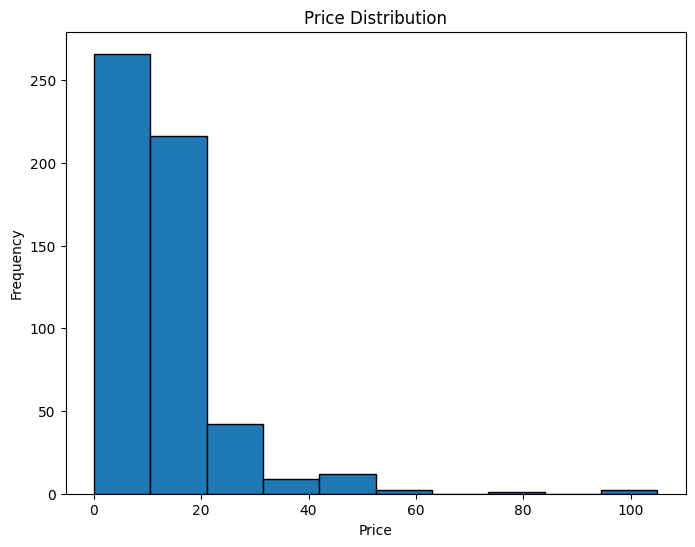

In [15]:
import matplotlib.pyplot as plt

# Histogram for price distribution
plt.figure(figsize=(8, 6))
data['price'].plot(kind='hist', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [17]:
# Maximum price
max_price = data['price'].max()
print('Maximum Price:', max_price)

# Minimum price
min_price = data['price'].min()
print('Minimum Price:', min_price)

# Average price
avg_price = data['price'].mean()
print('Average Price:', avg_price)

# Median price
median_price = data['price'].median()
print('Median Price:', median_price)


Maximum Price: 105
Minimum Price: 0
Average Price: 13.1
Median Price: 11.0


In [18]:
#Answer: Maximum price?
#105
#Answer: Minimum price?
#0
#Answer: Average price?
#13.1
#Answer: Median price?
#11

In [22]:
# Highest rating in the dataset
highest_rating = data['user_rating'].max()
print('Highest Rating:', highest_rating)
# Count of books with the highest rating
count_highest_rating = data[data['user_rating'] == highest_rating].shape[0]
print('Books with Highest Rating:', count_highest_rating)
# Book with the most reviews
most_reviews = data[data['reviews'] == data['reviews'].max()]['name'].iloc[0]
print('Book with Most Reviews:', most_reviews)
# Most expensive book in 2015
most_expensive_2015 = data[data['year'] == 2015].sort_values(by='price', ascending=False)['name'].iloc[0]
print('Most Expensive Book in 2015:', most_expensive_2015)
# Count of Fiction books in Top 50 in 2010
fiction_books_2010 = data[(data['year'] == 2010) & (data['genre'] == 'Fiction')].shape[0]
print('Fiction Books in 2010:', fiction_books_2010)
# Books rated 4.9 in 2010 or 2011
books_rated_4_9 = data[(data['user_rating'] == 4.9) & ((data['year'] == 2010) | (data['year'] == 2011))].shape[0]
print('Books Rated 4.9 in 2010 or 2011:', books_rated_4_9)
# Sorting books by price in 2015 that cost less than $8
sorted_books_2015 = data[(data['year'] == 2015) & (data['price'] < 8)].sort_values(by='price', ascending=True)

# Last book in the sorted list
last_book_sorted = sorted_books_2015['name'].iloc[-1]
print('Last Book in Sorted List:', last_book_sorted)

# Answer: What is the highest rating in the dataset? Answer:4.9
# Answer: How many books have this rating? Answer:52
# Answer: Which book has the most reviews? Answer:Where the Crawdads Sing
# Answer: Of the books that made it to the Top 50 in 2015, which book is the most expensive (you can use an intermediate dataframe)?
# Answer:Publication Manual of the American Psychological Association, 6th Edition
# Answer: How many Fiction books were in the Top 50 in 2010 (use &)? Answer:20
# Answer: How many books rated 4.9 were ranked in 2010 and 2011 (use | or the isin function)? Answer:1
# Answer: Which book is last in the sorted list? Answer:Old School (Diary of a Wimpy Kid #10)

Highest Rating: 4.9
Books with Highest Rating: 52
Book with Most Reviews: Where the Crawdads Sing
Most Expensive Book in 2015: Publication Manual of the American Psychological Association, 6th Edition
Fiction Books in 2010: 20
Books Rated 4.9 in 2010 or 2011: 1
Last Book in Sorted List: Old School (Diary of a Wimpy Kid #10)


In [24]:
# Aggregating maximum and minimum prices for each genre
price_by_genre = data.groupby('genre')['price'].agg(['max', 'min'])

# Display the results
print(price_by_genre)

# Answers
max_price_fiction = price_by_genre.loc['Fiction', 'max']
min_price_fiction = price_by_genre.loc['Fiction', 'min']
max_price_non_fiction = price_by_genre.loc['Non Fiction', 'max']
min_price_non_fiction = price_by_genre.loc['Non Fiction', 'min']

# Answer: The maximum price for the genre Fiction: Answer
#82
# Answer: Minimum price for Fiction genre: Answer
#0
# Answer: Maximum price for Non Fiction genre: Answer
#105
# Answer: Minimum price for Non Fiction genre: Answer
#0

             max  min
genre                
Fiction       82    0
Non Fiction  105    0
author
Abraham Verghese              2
Adam Gasiewski                1
Adam Mansbach                 1
Adir Levy                     1
Admiral William H. McRaven    1
                             ..
Walter Isaacson               3
William Davis                 2
William P. Young              2
Wizards RPG Team              3
Zhi Gang Sha                  2
Name: name, Length: 248, dtype: int64
Size of the table: 248
Author with most books: Jeff Kinney
Number of books by this author: 12


In [25]:

# Creating a new DataFrame with the count of books for each author
books_per_author = data.groupby('author')['name'].agg('count')

# Answering the questions
size_books_per_author = books_per_author.size
author_most_books = books_per_author.idxmax()
count_most_books = books_per_author.max()

# Display the results
print(books_per_author)
print("Size of the table:", size_books_per_author)
print("Author with most books:", author_most_books)
print("Number of books by this author:", count_most_books)

# Answer: What is the size of the table? Answer:
#248
# Answer: Which author has the most books? Answer:
#Jeff Kinney
# Answer: How many books by this author? Answer:
#12

author
Abraham Verghese              2
Adam Gasiewski                1
Adam Mansbach                 1
Adir Levy                     1
Admiral William H. McRaven    1
                             ..
Walter Isaacson               3
William Davis                 2
William P. Young              2
Wizards RPG Team              3
Zhi Gang Sha                  2
Name: name, Length: 248, dtype: int64
Size of the table: 248
Author with most books: Jeff Kinney
Number of books by this author: 12


In [26]:
# Creating a DataFrame with the average rating for each author
avg_rating_per_author = data.groupby('author')['user_rating'].agg('mean')

# Answering the questions
author_lowest_avg_rating = avg_rating_per_author.idxmin()
lowest_avg_rating = avg_rating_per_author.min()

# Display the results
print(avg_rating_per_author)
print("Author with lowest average rating:", author_lowest_avg_rating)
print("Average rating of this author:", lowest_avg_rating)


# Answer: Which author has the lowest average rating? Answer:
#Donna Tartt
# Answer: What is the average rating of this author? Answer:
#3.9

author
Abraham Verghese              4.600000
Adam Gasiewski                4.400000
Adam Mansbach                 4.800000
Adir Levy                     4.800000
Admiral William H. McRaven    4.700000
                                ...   
Walter Isaacson               4.566667
William Davis                 4.400000
William P. Young              4.600000
Wizards RPG Team              4.800000
Zhi Gang Sha                  4.600000
Name: user_rating, Length: 248, dtype: float64
Author with lowest average rating: Donna Tartt
Average rating of this author: 3.9


In [27]:
# Concatenating the two DataFrames
author_stats = pd.concat([books_per_author, avg_rating_per_author], axis=1)

# Sort by increasing number of books and increasing rating
author_stats_sorted = author_stats.sort_values(by=['name', 'user_rating'])

# Display the sorted DataFrame
print(author_stats_sorted)

# Answering the question
first_author_sorted = author_stats_sorted.index[0]

# Answer: Which author is first on the list?
#Muriel Barbery

                                    name  user_rating
author                                               
Muriel Barbery                         1     4.000000
Chris Cleave                           1     4.100000
Ian K. Smith M.D.                      1     4.100000
Pierre Dukan                           1     4.100000
Elizabeth Strout                       1     4.200000
...                                  ...          ...
American Psychological Association    10     4.500000
Suzanne Collins                       11     4.663636
Gary Chapman                          11     4.736364
Rick Riordan                          11     4.772727
Jeff Kinney                           12     4.800000

[248 rows x 2 columns]


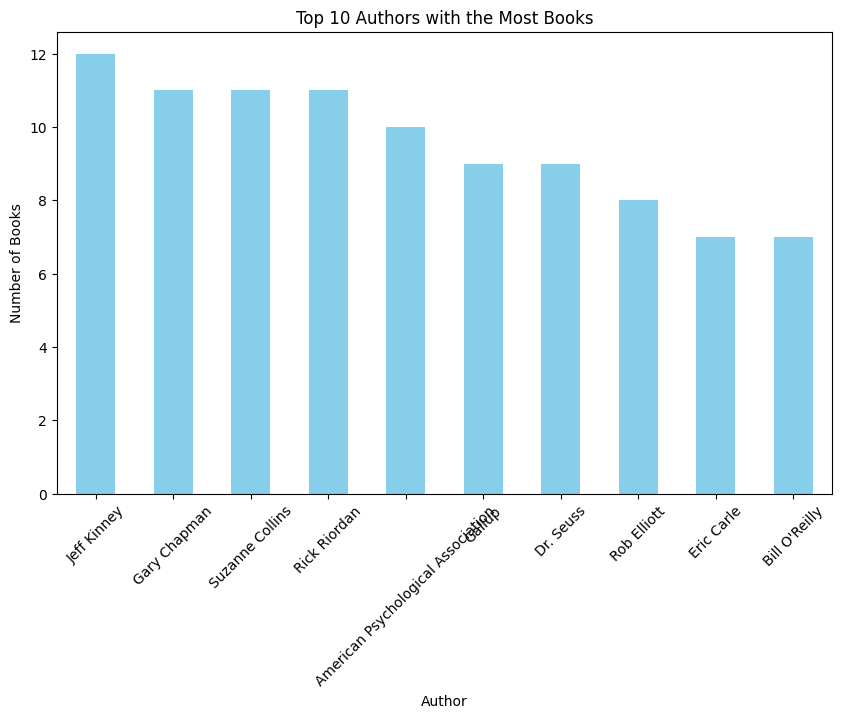

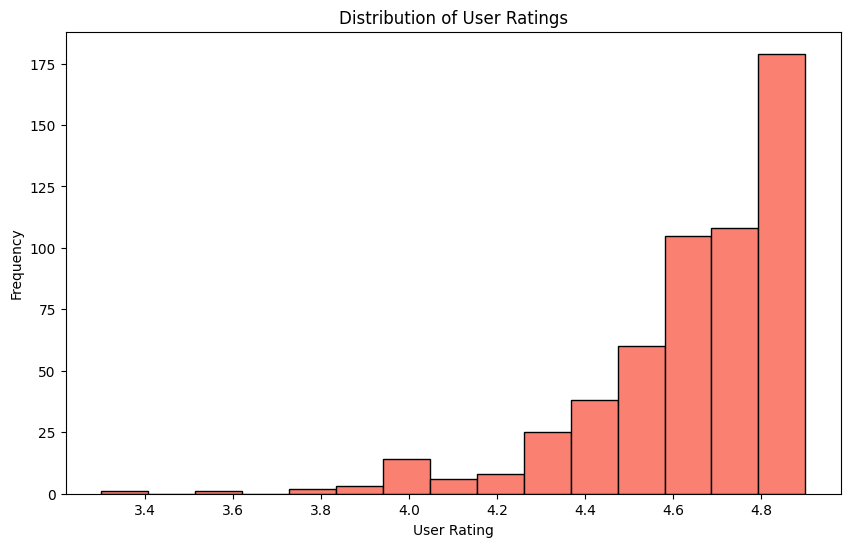

<Figure size 1000x600 with 0 Axes>

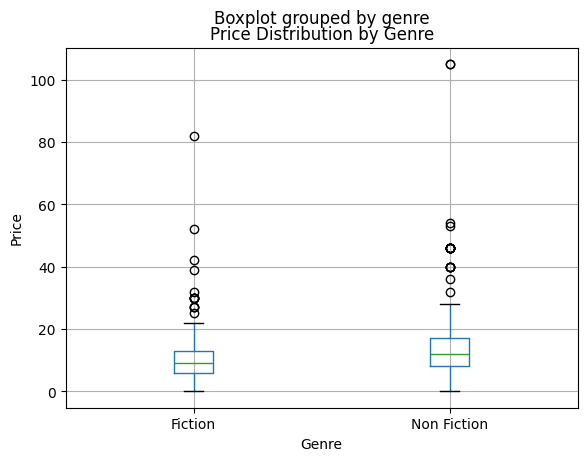

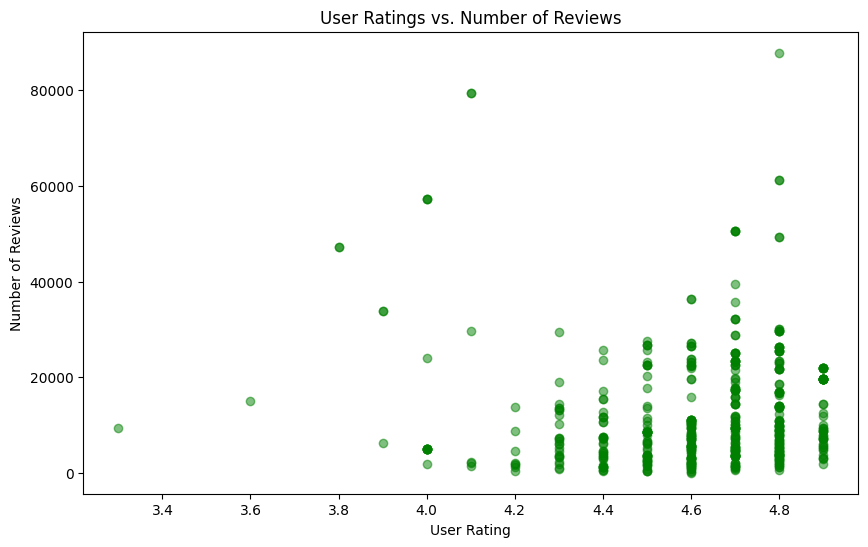

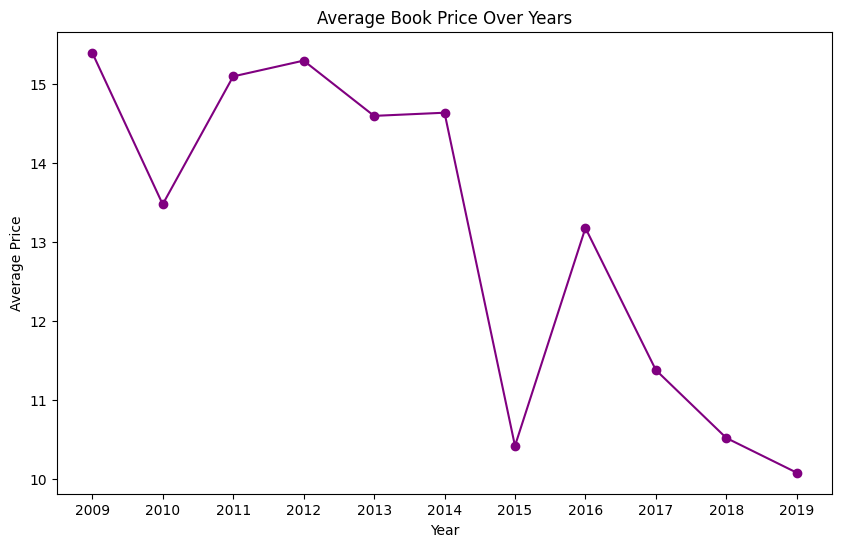

In [28]:
import matplotlib.pyplot as plt

# Directive for Jupyter Notebook to build the graphs inline
%matplotlib inline

top_authors = books_per_author.sort_values(ascending=False).head(10)  # Top 10 authors with most books

plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Authors with the Most Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
data['user_rating'].plot(kind='hist', bins=15, color='salmon', edgecolor='black')
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
data.boxplot(column='price', by='genre')
plt.title('Price Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['user_rating'], data['reviews'], alpha=0.5, color='green')
plt.title('User Ratings vs. Number of Reviews')
plt.xlabel('User Rating')
plt.ylabel('Number of Reviews')
plt.show()

average_price_year = data.groupby('year')['price'].mean()

plt.figure(figsize=(10, 6))
average_price_year.plot(kind='line', marker='o', color='purple')
plt.title('Average Book Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(data['year'].unique())  # Show every year on the x-axis
plt.show()
